In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [88]:
import warnings
warnings.filterwarnings('ignore')

In [89]:
import scipy

In [90]:
train_df = pd.read_csv(r"C:\Users\Pankaj\Desktop\house-prices-advanced-regression-techniques (2)\train.csv")
test_df = pd.read_csv(r"C:\Users\Pankaj\Desktop\house-prices-advanced-regression-techniques (2)\test.csv")

In [91]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [92]:
train_df.shape

(1460, 81)

In [93]:
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [94]:
test_df.shape

(1459, 80)

In [95]:
train_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

## Handling null values for training and testing dataset

In [96]:
train_df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [97]:
train_df_missing_data = train_df.isnull().sum()/len(train_df)*100
train_df_missing_data

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
                   ...    
MoSold            0.000000
YrSold            0.000000
SaleType          0.000000
SaleCondition     0.000000
SalePrice         0.000000
Length: 81, dtype: float64

In [98]:
sorted_train_df_missing_data = train_df_missing_data.drop(train_df_missing_data[train_df_missing_data==0].index).sort_values(ascending = False)
sorted_train_df_missing_data

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageYrBlt      5.547945
GarageType       5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtFinType2     2.602740
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtQual         2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
dtype: float64

In [99]:
train_df = train_df.drop(["PoolQC","MiscFeature","Alley","Fence","FireplaceQu"], axis=1)
test_df = test_df.drop(["PoolQC","MiscFeature","Alley","Fence","FireplaceQu"], axis=1)

In [100]:
train_df_missing_data = train_df.isnull().sum()/len(train_df)*100
train_df_missing_data

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
                   ...    
MoSold            0.000000
YrSold            0.000000
SaleType          0.000000
SaleCondition     0.000000
SalePrice         0.000000
Length: 76, dtype: float64

In [101]:
test_df_missing_data = test_df.isnull().sum()/len(train_df)*100
test_df_missing_data

Id                0.000000
MSSubClass        0.000000
MSZoning          0.273973
LotFrontage      15.547945
LotArea           0.000000
                   ...    
MiscVal           0.000000
MoSold            0.000000
YrSold            0.000000
SaleType          0.068493
SaleCondition     0.000000
Length: 75, dtype: float64

In [102]:
sorted_train_df_missing_data = train_df_missing_data.drop(train_df_missing_data[train_df_missing_data==0].index).sort_values(ascending = False)
sorted_train_df_missing_data

LotFrontage     17.739726
GarageCond       5.547945
GarageQual       5.547945
GarageFinish     5.547945
GarageYrBlt      5.547945
GarageType       5.547945
BsmtFinType2     2.602740
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtQual         2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
dtype: float64

In [103]:
train_df["LotFrontage"] = train_df["LotFrontage"].fillna(train_df["LotFrontage"].mean())
train_df["GarageCond"] = train_df["GarageCond"].fillna(train_df["GarageCond"].mode()[0])
train_df["GarageQual"] = train_df["GarageQual"].fillna(train_df["GarageQual"].mode()[0])
train_df["GarageFinish"] = train_df["GarageFinish"].fillna(train_df["GarageFinish"].mode()[0])
train_df["GarageYrBlt"] = train_df["GarageYrBlt"].fillna(train_df["GarageYrBlt"].mean())
train_df["GarageType"] = train_df["GarageType"].fillna(train_df["GarageType"].mode()[0])
train_df["BsmtFinType2"] = train_df["BsmtFinType2"].fillna(train_df["BsmtFinType2"].mode()[0])
train_df["BsmtExposure"] = train_df["BsmtExposure"].fillna(train_df["BsmtExposure"].mode()[0])
train_df["BsmtFinType1"] = train_df["BsmtFinType1"].fillna(train_df["BsmtFinType1"].mode()[0])
train_df["BsmtCond"] = train_df["BsmtCond"].fillna(train_df["BsmtCond"].mode()[0])
train_df["BsmtQual"] = train_df["BsmtQual"].fillna(train_df["BsmtQual"].mode()[0])
train_df["MasVnrArea"] = train_df["MasVnrArea"].fillna(train_df["MasVnrArea"].mean())
train_df["MasVnrType"] = train_df["MasVnrType"].fillna(train_df["MasVnrType"].mode()[0])
train_df["Electrical"] = train_df["Electrical"].fillna(train_df["Electrical"].mode()[0])

In [104]:
train_df.isnull().sum().sum()

0

In [105]:
sorted_test_df_missing_data = test_df_missing_data.drop(test_df_missing_data[test_df_missing_data==0].index).sort_values(ascending = False)
sorted_test_df_missing_data

LotFrontage     15.547945
GarageQual       5.342466
GarageFinish     5.342466
GarageYrBlt      5.342466
GarageCond       5.342466
GarageType       5.205479
BsmtCond         3.082192
BsmtExposure     3.013699
BsmtQual         3.013699
BsmtFinType1     2.876712
BsmtFinType2     2.876712
MasVnrType       1.095890
MasVnrArea       1.027397
MSZoning         0.273973
BsmtFullBath     0.136986
Functional       0.136986
Utilities        0.136986
BsmtHalfBath     0.136986
Exterior2nd      0.068493
Exterior1st      0.068493
SaleType         0.068493
BsmtFinSF1       0.068493
BsmtUnfSF        0.068493
TotalBsmtSF      0.068493
KitchenQual      0.068493
GarageCars       0.068493
GarageArea       0.068493
BsmtFinSF2       0.068493
dtype: float64

In [106]:
test_df["LotFrontage"] = test_df["LotFrontage"].fillna(test_df["LotFrontage"].mean())
test_df["GarageQual"] = test_df["GarageQual"].fillna(test_df["GarageQual"].mode()[0])
test_df["GarageFinish"] = test_df["GarageFinish"].fillna(test_df["GarageFinish"].mode()[0])
test_df["GarageYrBlt"] = test_df["GarageYrBlt"].fillna(test_df["GarageYrBlt"].mean())
test_df["GarageCond"] = test_df["GarageCond"].fillna(test_df["GarageCond"].mode()[0])
test_df["GarageType"] = test_df["GarageType"].fillna(test_df["GarageType"].mode()[0])
test_df["BsmtCond"] = test_df["BsmtCond"].fillna(test_df["BsmtCond"].mode()[0])
test_df["BsmtExposure"] = test_df["BsmtExposure"].fillna(test_df["BsmtExposure"].mode()[0])
test_df["BsmtQual"] = test_df["BsmtQual"].fillna(test_df["BsmtQual"].mode()[0])
test_df["BsmtFinType1"] = test_df["BsmtFinType1"].fillna(test_df["BsmtFinType1"].mode()[0])
test_df["BsmtFinType2"] = test_df["BsmtFinType2"].fillna(test_df["BsmtFinType2"].mode()[0])
test_df["MasVnrType"] = test_df["MasVnrType"].fillna(test_df["MasVnrType"].mode()[0])
test_df["MasVnrArea"] = test_df["MasVnrArea"].fillna(test_df["MasVnrArea"].mean())
test_df["MSZoning"] = test_df["MSZoning"].fillna(test_df["MSZoning"].mode()[0])
test_df["BsmtFullBath"] = test_df["BsmtFullBath"].fillna(test_df["BsmtFullBath"].median())
test_df["Functional"] = test_df["Functional"].fillna(test_df["Functional"].mode()[0])
test_df["Utilities"] = test_df["Utilities"].fillna(test_df["Utilities"].mode()[0])
test_df["BsmtHalfBath"] = test_df["BsmtHalfBath"].fillna(test_df["BsmtHalfBath"].median())
test_df["Exterior2nd"] = test_df["Exterior2nd"].fillna(test_df["Exterior2nd"].mode()[0])
test_df["Exterior1st"] = test_df["Exterior1st"].fillna(test_df["Exterior1st"].mode()[0])
test_df["SaleType"] = test_df["SaleType"].fillna(test_df["SaleType"].mode()[0])
test_df["BsmtFinSF1"] = test_df["BsmtFinSF1"].fillna(test_df["BsmtFinSF1"].mean())
test_df["BsmtUnfSF"] = test_df["BsmtUnfSF"].fillna(test_df["BsmtUnfSF"].mean())
test_df["TotalBsmtSF"] = test_df["TotalBsmtSF"].fillna(test_df["TotalBsmtSF"].mean())
test_df["KitchenQual"] = test_df["KitchenQual"].fillna(test_df["KitchenQual"].mode()[0])
test_df["GarageCars"] = test_df["GarageCars"].fillna(test_df["GarageCars"].median())
test_df["GarageArea"] = test_df["GarageArea"].fillna(test_df["GarageArea"].mean())
test_df["BsmtFinSF2"] = test_df["BsmtFinSF2"].fillna(test_df["BsmtFinSF2"].mean())

In [107]:
test_df.isnull().sum().sum()

0

In [108]:
train_df = train_df.drop(["Id"], axis=1)
test_df = test_df.drop(["Id"], axis=1)

In [109]:
#remove YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)
train_df = train_df.drop(["YearRemodAdd"], axis=1)
test_df = test_df.drop(["YearRemodAdd"], axis=1)

In [110]:
y = train_df["SalePrice"]
train_df = train_df.drop(["SalePrice"], axis=1)

In [111]:
train_df.shape

(1460, 73)

In [112]:
test_df.shape

(1459, 73)

In [113]:
corr_matrix = train_df.corr().abs()
corr_matrix_upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(np.bool))
corr_matrix_upper

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
MSSubClass,NaN,0.357056,0.139781,0.032628,0.059316,0.027850,0.022895,0.069836,0.065649,0.140759,...,0.098672,0.012579,0.006100,0.012037,0.043825,0.026030,0.008283,0.007683,0.013585,0.021407
LotFrontage,NaN,NaN,0.306795,0.234196,0.052820,0.117598,0.179283,0.215828,0.043340,0.122156,...,0.323663,0.077106,0.137454,0.009790,0.062335,0.037684,0.180868,0.001168,0.010158,0.006768
LotArea,NaN,NaN,NaN,0.105806,0.005636,0.014228,0.103960,0.214103,0.111170,0.002618,...,0.180403,0.171698,0.084774,0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,0.014261
OverallQual,NaN,NaN,NaN,NaN,0.091932,0.572323,0.410238,0.239666,0.059119,0.308159,...,0.562022,0.238923,0.308819,0.113937,0.030371,0.064886,0.065166,0.031406,0.070815,0.027347
OverallCond,NaN,NaN,NaN,NaN,NaN,0.375983,0.127788,0.046231,0.040229,0.136841,...,0.151521,0.003334,0.032589,0.070356,0.025504,0.054811,0.001985,0.068777,0.003511,0.043950
YearBuilt,NaN,NaN,NaN,NaN,NaN,NaN,0.314745,0.249503,0.049107,0.149040,...,0.478954,0.224880,0.188686,0.387268,0.031355,0.050364,0.004950,0.034383,0.012398,0.013618
MasVnrArea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.263582,0.072302,0.114184,...,0.372567,0.159349,0.124965,0.109849,0.018795,0.061453,0.011723,0.029815,0.005940,0.008184
BsmtFinSF1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.050117,0.495251,...,0.296970,0.204306,0.111761,0.102303,0.026451,0.062021,0.140491,0.003571,0.015727,0.014359
BsmtFinSF2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.209294,...,0.018227,0.067898,0.003093,0.036543,0.029993,0.088871,0.041709,0.004940,0.015211,0.031706
BsmtUnfSF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.183303,0.005316,0.129005,0.002538,0.020764,0.012579,0.035092,0.023837,0.034888,0.041258


In [114]:
to_drop=[column for column in corr_matrix_upper.columns if any (corr_matrix_upper[column] > 0.75)]
train_df=train_df.drop(to_drop,axis=1)
test_df=test_df.drop(to_drop,axis=1)

In [115]:
to_drop

['1stFlrSF', 'TotRmsAbvGrd', 'GarageYrBlt', 'GarageArea']

In [116]:
train_df.shape

(1460, 69)

In [117]:
test_df.shape

(1459, 69)

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

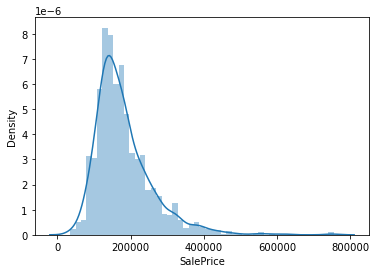

In [118]:
sns.distplot(y)

<AxesSubplot:xlabel='SalePrice'>

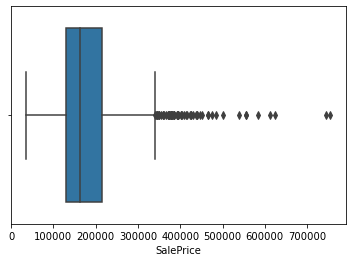

In [119]:
sns.boxplot(y)

In [120]:
train_df = pd.concat([train_df, pd.DataFrame(y)], axis = 1)
train_df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [121]:
print("Min Saleprice: {}".format(min(train_df['SalePrice'])))
print("0th % Saleprice: {}".format(train_df['SalePrice'].quantile(0)))
print("25th % Saleprice: {}".format(train_df['SalePrice'].quantile(0.25)))
print("75th % Saleprice: {}".format(train_df['SalePrice'].quantile(0.75)))
print("100th % Saleprice: {}".format(train_df['SalePrice'].quantile(1)))
print("Max Saleprice: {}".format(max(train_df['SalePrice'])))

Min Saleprice: 34900
0th % Saleprice: 34900.0
25th % Saleprice: 129975.0
75th % Saleprice: 214000.0
100th % Saleprice: 755000.0
Max Saleprice: 755000


In [122]:
train_df = train_df.drop(train_df[train_df["SalePrice"]>330000].index)

In [123]:
train_df[train_df["SalePrice"]>330000]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [124]:
y = train_df["SalePrice"]
train_df = train_df.drop(["SalePrice"], axis=1)

In [125]:
train_df.head(30)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.000000,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,61,0,0,0,0,0,2,2008,WD,Normal
1,20,RL,80.000000,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,0,5,2007,WD,Normal
2,60,RL,68.000000,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,42,0,0,0,0,0,9,2008,WD,Normal
3,70,RL,60.000000,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,35,272,0,0,0,0,2,2006,WD,Abnorml
4,60,RL,84.000000,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,84,0,0,0,0,0,12,2008,WD,Normal
5,50,RL,85.000000,14115,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,30,0,320,0,0,700,10,2009,WD,Normal
6,20,RL,75.000000,10084,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,57,0,0,0,0,0,8,2007,WD,Normal
7,60,RL,70.049958,10382,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,204,228,0,0,0,350,11,2009,WD,Normal
8,50,RM,51.000000,6120,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,205,0,0,0,0,4,2008,WD,Abnorml
9,190,RL,50.000000,7420,Pave,Reg,Lvl,AllPub,Corner,Gtl,...,4,0,0,0,0,0,1,2008,WD,Normal


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

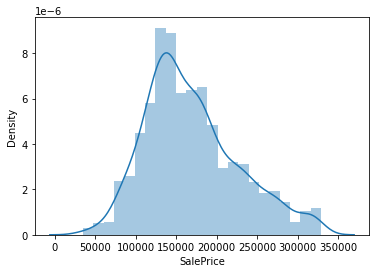

In [126]:
sns.distplot(y)

<AxesSubplot:xlabel='SalePrice'>

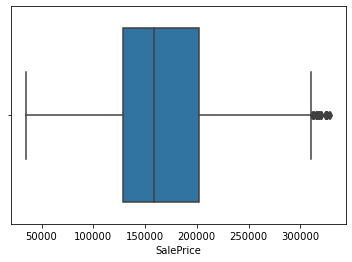

In [127]:
sns.boxplot(y)

In [128]:
train_df['Total_basement'] = train_df['BsmtFinSF1'] + train_df['BsmtFinSF2']  + train_df['BsmtUnfSF']

In [129]:
train_df[['Total_basement','TotalBsmtSF']]

,Total_basement,TotalBsmtSF
0,856,856
1,1262,1262
2,920,920
3,756,756
4,1145,1145
...,...,...
1455,953,953
1456,1542,1542
1457,1152,1152
1458,1078,1078


In [130]:
train_df=train_df.drop(['BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','Total_basement'],axis=1)
test_df=test_df.drop(['BsmtFinSF1','BsmtFinSF2','BsmtUnfSF'],axis=1)

In [131]:
train_df.shape

(1389, 66)

In [132]:
test_df.shape

(1459, 66)

In [133]:
train_df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'KitchenQual', 'Functional', 'Fireplaces', 'GarageType',
       'GarageFinish', 'GarageCars', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleConditi

In [134]:
train_df['Utilities'].value_counts()

AllPub    1388
NoSeWa       1
Name: Utilities, dtype: int64

In [135]:
train_df=train_df.drop(["ExterQual"],axis=1)
test_df=test_df.drop(["ExterQual"],axis=1)

In [136]:
train_df=train_df.drop(["Utilities"],axis=1)
test_df=test_df.drop(["Utilities"],axis=1)

In [137]:
train_df.shape

(1389, 64)

In [138]:
test_df.shape

(1459, 64)

In [139]:
train_df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'Functional', 'Fireplaces', 'GarageType', 'GarageFinish', 'GarageCars',
       'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SaleType', 'SaleCondition'],
      dtype='object')

In [140]:
train_df['ExterCond']=train_df['ExterCond'].replace({'Po': 1 ,'Fa': 2,'TA': 3,'Gd': 4,'Ex': 5})
train_df['BsmtQual']=train_df['BsmtQual'].replace({'Po': 1 ,'Fa': 2,'TA': 3,'Gd': 4,'Ex': 5})
train_df['BsmtCond']=train_df['BsmtCond'].replace({'Po': 1 ,'Fa': 2,'TA': 3,'Gd': 4,'Ex': 5})
train_df['HeatingQC']=train_df['HeatingQC'].replace({'Po': 1 ,'Fa': 2,'TA': 3,'Gd': 4,'Ex': 5})
train_df['KitchenQual']=train_df['KitchenQual'].replace({'Po': 1 ,'Fa': 2,'TA': 3,'Gd': 4,'Ex': 5})
train_df['GarageCond']=train_df['GarageCond'].replace({'Po': 1 ,'Fa': 2,'TA': 3,'Gd': 4,'Ex': 5})

In [141]:
test_df['ExterCond']=test_df['ExterCond'].replace({'Po': 1 ,'Fa': 2,'TA': 3,'Gd': 4,'Ex': 5})
test_df['BsmtQual']=test_df['BsmtQual'].replace({'Po': 1 ,'Fa': 2,'TA': 3,'Gd': 4,'Ex': 5})
test_df['BsmtCond']=test_df['BsmtCond'].replace({'Po': 1 ,'Fa': 2,'TA': 3,'Gd': 4,'Ex': 5})
test_df['HeatingQC']=test_df['HeatingQC'].replace({'Po': 1 ,'Fa': 2,'TA': 3,'Gd': 4,'Ex': 5})
test_df['KitchenQual']=test_df['KitchenQual'].replace({'Po': 1 ,'Fa': 2,'TA': 3,'Gd': 4,'Ex': 5})
test_df['GarageCond']=test_df['GarageCond'].replace({'Po': 1 ,'Fa': 2,'TA': 3,'Gd': 4,'Ex': 5})

In [142]:
train_df['SaleCondition'].value_counts()

Normal     1161
Abnorml     100
Partial      93
Family       20
Alloca       11
AdjLand       4
Name: SaleCondition, dtype: int64

In [143]:
pd.get_dummies(train_df['SaleCondition'])

,Abnorml,AdjLand,Alloca,Family,Normal,Partial
0,0,0,0,0,1,0
1,0,0,0,0,1,0
2,0,0,0,0,1,0
3,1,0,0,0,0,0
4,0,0,0,0,1,0
...,...,...,...,...,...,...
1455,0,0,0,0,1,0
1456,0,0,0,0,1,0
1457,0,0,0,0,1,0
1458,0,0,0,0,1,0


In [144]:
train_df=pd.get_dummies(train_df)
test_df=pd.get_dummies(test_df)

In [145]:
train_df_copy=train_df
train_df

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,MasVnrArea,ExterCond,BsmtQual,BsmtCond,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,196.0,3,4,3,...,0,0,0,1,0,0,0,0,1,0
1,20,80.0,9600,6,8,1976,0.0,3,4,3,...,0,0,0,1,0,0,0,0,1,0
2,60,68.0,11250,7,5,2001,162.0,3,4,3,...,0,0,0,1,0,0,0,0,1,0
3,70,60.0,9550,7,5,1915,0.0,3,3,4,...,0,0,0,1,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,350.0,3,4,3,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,1999,0.0,3,4,3,...,0,0,0,1,0,0,0,0,1,0
1456,20,85.0,13175,6,6,1978,119.0,3,4,3,...,0,0,0,1,0,0,0,0,1,0
1457,70,66.0,9042,7,9,1941,0.0,4,3,4,...,0,0,0,1,0,0,0,0,1,0
1458,20,68.0,9717,5,6,1950,0.0,3,3,3,...,0,0,0,1,0,0,0,0,1,0


In [146]:
train_df.shape

(1389, 235)

In [147]:
train_df.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'MasVnrArea', 'ExterCond', 'BsmtQual', 'BsmtCond',
       ...
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=235)

In [148]:
test_df_copy=test_df
test_df

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,MasVnrArea,ExterCond,BsmtQual,BsmtCond,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,20,80.0,11622,5,6,1961,0.0,3,3,3,...,0,0,0,1,0,0,0,0,1,0
1,20,81.0,14267,6,6,1958,108.0,3,3,3,...,0,0,0,1,0,0,0,0,1,0
2,60,74.0,13830,5,5,1997,0.0,3,4,3,...,0,0,0,1,0,0,0,0,1,0
3,60,78.0,9978,6,6,1998,20.0,3,3,3,...,0,0,0,1,0,0,0,0,1,0
4,120,43.0,5005,8,5,1992,0.0,3,4,3,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,21.0,1936,4,7,1970,0.0,3,3,3,...,0,0,0,1,0,0,0,0,1,0
1455,160,21.0,1894,4,5,1970,0.0,3,3,3,...,0,0,0,1,1,0,0,0,0,0
1456,20,160.0,20000,5,7,1960,0.0,3,3,3,...,0,0,0,1,1,0,0,0,0,0
1457,85,62.0,10441,5,5,1992,0.0,3,4,3,...,0,0,0,1,0,0,0,0,1,0


In [149]:
test_df.shape

(1459, 220)

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

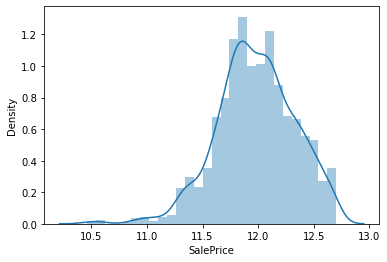

In [150]:
SalePrice=np.log(y)
sns.distplot(SalePrice)

In [151]:
SalePrice.skew()

-0.37027279006875324

In [152]:
SalePrice.kurt()

0.6199705899279078

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

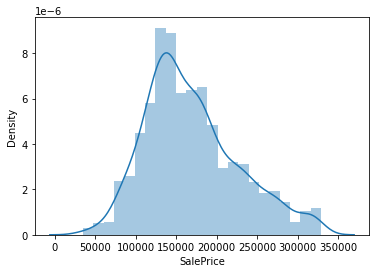

In [153]:
sns.distplot(y)

In [154]:
y.skew()

0.6285181896956861

In [155]:
y.kurt()

-0.0009891500035359435

In [156]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

NameError: name 'X_train' is not defined

In [157]:
a=train_df.columns
a

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'MasVnrArea', 'ExterCond', 'BsmtQual', 'BsmtCond',
       ...
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=235)

In [158]:
b=test_df.columns
b

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'MasVnrArea', 'ExterCond', 'BsmtQual', 'BsmtCond',
       ...
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=220)

In [159]:
a=set(a)
b=set(b)
c=a-b
c

{'Condition2_RRAe',
 'Condition2_RRAn',
 'Condition2_RRNn',
 'Electrical_Mix',
 'Exterior1st_ImStucc',
 'Exterior1st_Stone',
 'Exterior2nd_Other',
 'GarageQual_Ex',
 'Heating_Floor',
 'Heating_OthW',
 'HouseStyle_2.5Fin',
 'RoofMatl_ClyTile',
 'RoofMatl_Membran',
 'RoofMatl_Metal',
 'RoofMatl_Roll'}

In [160]:
len(c)

15

In [161]:
test_df[['Condition2_RRAe',
 'Condition2_RRAn',
 'Condition2_RRNn',
 'Electrical_Mix',
 'Exterior1st_ImStucc',
 'Exterior1st_Stone',
 'Exterior2nd_Other',
'GarageQual_Ex',
 'Heating_Floor',
 'Heating_OthW',
 'HouseStyle_2.5Fin',
 'RoofMatl_ClyTile',
 'RoofMatl_Membran',
 'RoofMatl_Metal',
 'RoofMatl_Roll']] =pd.DataFrame([[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]],index=test_df.index)

In [162]:
train_df.shape

(1389, 235)

In [163]:
train_df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,MasVnrArea,ExterCond,BsmtQual,BsmtCond,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,196.0,3,4,3,...,0,0,0,1,0,0,0,0,1,0
1,20,80.0,9600,6,8,1976,0.0,3,4,3,...,0,0,0,1,0,0,0,0,1,0
2,60,68.0,11250,7,5,2001,162.0,3,4,3,...,0,0,0,1,0,0,0,0,1,0
3,70,60.0,9550,7,5,1915,0.0,3,3,4,...,0,0,0,1,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,350.0,3,4,3,...,0,0,0,1,0,0,0,0,1,0


In [164]:
test_df.shape

(1459, 235)

In [165]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(train_df['GrLivArea'], SalePrice, test_size = 0.2, random_state = 1)

In [166]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(1111,)
(278,)
(1111,)
(278,)


In [167]:
X_train=np.array(X_train).reshape(-1,1)
X_test=np.array(X_test).reshape(-1,1)

In [168]:
from sklearn.linear_model import LinearRegression

In [169]:
lr=LinearRegression()
lr.fit(X_train,Y_train)

LinearRegression()

In [170]:
y_pred=lr.predict(X_test)

In [171]:
y_pred 

array([11.96016552, 12.07498896, 12.09642902, 12.11643975, 11.79388593,
       12.23936277, 11.75434093, 11.86297057, 12.13645047, 12.34513374,
       11.60283116, 12.09738192, 11.70860213, 11.98112914, 12.22459295,
       11.81866111, 11.98875227, 11.66191044, 11.92967299, 11.70860213,
       11.86201768, 11.78292768, 11.91156805, 12.21744626, 11.96874155,
       11.82771358, 12.01162167, 11.69430876, 12.41469483, 11.7862628 ,
       11.96445353, 11.91156805, 11.68668562, 12.06450716, 12.04687866,
       11.7228955 , 12.10071704, 12.54047653, 12.13549758, 12.4756799 ,
       11.8029384 , 11.65095219, 11.90489781, 12.24603301, 11.69430876,
       12.40373658, 12.14883806, 11.96731221, 11.70860213, 12.3446573 ,
       12.07403607, 12.08642366, 11.73766532, 11.79007436, 11.68668562,
       11.90680359, 12.1221571 , 11.74004755, 11.8029384 , 12.01114522,
       11.65333441, 11.8715466 , 11.74957647, 12.03115595, 12.09690547,
       11.99780474, 11.98970516, 11.9453957 , 12.49997863, 11.69

In [172]:
from sklearn.metrics import mean_squared_error , mean_absolute_error , r2_score

In [173]:
r2_score(Y_test,y_pred)

0.39799333809944315

In [174]:
mean_squared_error(Y_test,y_pred) #MSE

0.07640351476984857

In [175]:
mean_absolute_error(Y_test,y_pred)   #MAE

0.20611465740965224

In [176]:
np.sqrt(mean_squared_error(Y_test,y_pred))   #RMSE

0.2764118571440968

### Multiple Linear Regression

In [177]:
X=train_df

In [178]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,SalePrice,test_size=0.2, random_state=1 )

In [179]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(1111, 235)
(278, 235)
(1111,)
(278,)


In [180]:
X_train_copy = X_train
X_test_copy = X_test
Y_train_copy = Y_train
Y_test_copy = Y_test

In [181]:
lr1=LinearRegression()

In [182]:
lr1.fit(X_train,Y_train)

LinearRegression()

In [183]:
y_pred1=lr1.predict(X_test)

In [184]:
y_pred1

array([12.10011845, 12.32861481, 11.97409745, 11.88510424, 11.38164714,
       12.10618955, 11.86608703, 11.44383759, 12.27029492, 11.79064671,
       11.61898333, 11.72320698, 11.75667813, 11.96112998, 12.02739381,
       11.84741337, 11.87701679, 11.48295036, 12.31016022, 11.22307907,
       11.63162494, 11.72239051, 11.99877049, 12.3849096 , 11.53681474,
       11.74247927, 12.44205406, 11.49457468, 12.66884204, 11.77393124,
       11.86523806, 11.96815113, 12.04892207, 11.94834315, 11.72634064,
       11.19149076, 12.04425658, 12.46527482, 12.18011812, 12.6689302 ,
       10.91715265, 11.50366835, 12.13889344, 12.30471627, 11.69998333,
       12.475344  , 11.97111793, 12.27889639, 11.82930739, 11.77672348,
       12.40058997, 11.78574256, 11.78367897, 11.74892747, 11.85194299,
       11.58432552, 11.96206013, 11.40510956, 11.97489132, 11.32613807,
       11.66027147, 11.8326995 , 11.74894693, 12.37280132, 11.90470022,
       12.04639383, 12.2334881 , 12.18487473, 12.27688508, 11.71

In [185]:
r2_score(Y_test,y_pred1)

0.8351027155271287

In [186]:
mse=mean_squared_error(Y_test,y_pred1)
mse

0.020927894834180564

In [187]:
mean_absolute_error(Y_test,y_pred1)

0.08763755692360778

In [188]:
np.sqrt(mse)

0.1446647670795504

In [189]:
from sklearn.preprocessing import MinMaxScaler , StandardScaler , Normalizer

In [190]:
# X_train = X_train_copy
# X_test = X_test_copy
# Y_train = Y_train_copy

In [191]:
# sc=StandardScaler()
# sc.fit(X_train)
# X_train=sc.transform(X_train)
# X_test=sc.transform(X_test)

In [192]:
# lrsc=LinearRegression()
# lrsc.fit(X_train,Y_train)

In [193]:
# y_predSc=lrsc.predict(X_test)

In [194]:
# r2_score(Y_test,y_predSc)

In [195]:
# mse=mean_squared_error(Y_test,y_predSc)
# mse

In [196]:
# mean_absolute_error(Y_test,y_predSc)

In [197]:
# np.sqrt(mse)

Makes no sense

In [198]:
# X_train = X_train_copy
# X_test = X_test_copy
# Y_train = Y_train_copy

In [199]:
# Mn=MinMaxScaler()
# Mn.fit(X_train)
# X_train=Mn.transform(X_train)
# X_test=Mn.transform(X_test)

In [200]:
# lrsc=LinearRegression()
# lrsc.fit(X_train,Y_train)

In [201]:
# y_predMn=lrsc.predict(X_test)

In [202]:
# r2_score(Y_test,y_predMn)

In [203]:
# mse=mean_squared_error(Y_test,y_predMn)
# mse

In [204]:
# mean_absolute_error(Y_test,y_predMn)

In [205]:
# np.sqrt(mse)

Makes no sense

In [206]:
X_train = X_train_copy
X_test = X_test_copy
Y_train = Y_train_copy

In [207]:
nm=Normalizer()

In [208]:
nm.fit(X_train)
X_train=nm.transform(X_train)
X_test=nm.transform(X_test)

In [209]:
lrnm=LinearRegression()

In [210]:
lrnm.fit(X_train,Y_train)

LinearRegression()

In [211]:
y_predNm=lrnm.predict(X_test)

In [212]:
y_predNm

array([12.13172464, 12.19003759, 11.84834638, 11.96990759, 11.22668571,
       12.250383  , 11.86982153, 11.23742927, 12.28765899, 11.86233808,
       11.65558751, 11.83946487, 11.82804467, 11.90711604, 11.99291493,
       11.77311146, 11.92878846, 11.44460071, 12.35337906, 11.59552031,
       11.63438259, 11.78472289, 11.99617591, 12.43352888, 11.67838478,
       11.75327438, 12.31162632, 11.04518371, 12.50338519, 11.76811817,
       11.8918063 , 11.99127489, 12.08798101, 12.01314916, 11.73555723,
       11.53780875, 12.05797655, 12.34367386, 12.20166277, 12.57287842,
       10.92803339, 11.46623344, 12.19650602, 12.28649859, 11.82206394,
       12.36075589, 11.97175014, 12.31062888, 11.81936768, 11.82759363,
       12.35564299, 12.11309242, 11.73484886, 11.73204931, 11.77258625,
       11.51772852, 11.98792482, 11.57487061, 11.98461436, 11.29628147,
       11.65583786, 11.8952409 , 11.79243427, 12.37303961, 11.80105783,
       12.03611726, 12.30181121, 12.18209182, 12.3334118 , 11.65

In [213]:
r2_score(Y_test,y_predNm)

0.8324775296843457

In [214]:
mse=mean_squared_error(Y_test,y_predNm)
mse

0.021261069594538603

In [215]:
mean_absolute_error(Y_test,y_predNm)

0.10389974556368972

In [216]:
np.sqrt(mse)

0.14581176082380531

In [217]:
from sklearn.decomposition import PCA

In [218]:
X_train = X_train_copy
X_test = X_test_copy
Y_train = Y_train_copy

In [219]:
pca = PCA(n_components=200)
X_train1 = pca.fit_transform(X_train)
X_test1 = pca.transform(X_test)

In [220]:
print(X_train1.shape)
print(X_test1.shape)

(1111, 200)
(278, 200)


In [221]:
lr=LinearRegression()
lr.fit(X_train1,Y_train)

LinearRegression()

In [222]:
y_pred=lr.predict(X_test1)

In [223]:
np.sqrt(mean_squared_error(Y_test,y_pred))

0.15225552470515458

In [224]:
r2_score(Y_test,y_pred)

0.8173439422509708

In [225]:
from sklearn.model_selection import GridSearchCV
ridge_alpha = [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
lasso_alpha = [0.001, 0.01, 0.1, 1, 10, 100]
param_grid = dict(alpha = lasso_alpha)
param_grid_ = dict(alpha = ridge_alpha)

In [226]:
from sklearn.linear_model import Lasso , Ridge

In [227]:
ls=Lasso()

In [228]:
rd=Ridge()

In [229]:
grid = GridSearchCV(estimator=rd, param_grid=param_grid_, cv=10, scoring= 'r2')
grid.fit(X_train1, Y_train)

GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]},
             scoring='r2')

In [230]:
grid.best_score_

0.8282922370097232

In [231]:
grid.best_params_

{'alpha': 10}

In [232]:
from sklearn.linear_model import Lasso , Ridge

In [233]:
ls = Lasso()
ls.fit(X_train, Y_train)
y_train_pred = ls.predict(X_train)

In [234]:
y_pred = ls.predict(X_test)

In [235]:
np.sqrt(mean_squared_error(Y_test, y_pred)) # RMSE

0.2079113961218932

In [236]:
r2_score(Y_test, y_pred)

0.6594000742892168

In [237]:
rd = Ridge()

In [238]:
rd.fit(X_train, Y_train)

Ridge()

In [239]:
y_pred = rd.predict(X_test)

In [240]:
y_pred

array([12.09839702, 12.27366476, 11.91939958, 11.94170111, 11.54263598,
       12.08559004, 11.87283141, 11.44820316, 12.26710995, 11.81125751,
       11.62796884, 11.67971652, 11.75565875, 11.96588457, 12.03971776,
       11.819064  , 11.91317907, 11.48798967, 12.29533616, 11.27028494,
       11.61606078, 11.71224501, 11.9698119 , 12.36157861, 11.4888314 ,
       11.72262697, 12.42385895, 11.47669323, 12.68684999, 11.77317261,
       11.75617991, 12.01236309, 12.04542657, 11.98541966, 11.71430747,
       11.19952527, 12.0954562 , 12.38471203, 12.18420035, 12.67881869,
       10.90270487, 11.5300029 , 12.14190115, 12.33508457, 11.70017214,
       12.47921059, 11.92831722, 12.27340493, 11.85691544, 11.81161601,
       12.42067891, 11.89078017, 11.78458163, 11.76156874, 11.84561331,
       11.6122201 , 11.98964974, 11.43212687, 11.98915237, 11.29815118,
       11.64961516, 11.831977  , 11.76229022, 12.36978352, 11.86271772,
       12.06673652, 12.2369878 , 12.15997689, 12.307154  , 11.72

In [241]:
np.sqrt(mean_squared_error(Y_test, y_pred)) # RMSE

0.14204820600393162

In [242]:
r2_score(Y_test, y_pred)

0.8410137865856944

In [243]:
pred_final=np.power(10,y_pred)